In [2]:
import sys
sys.path.insert(0, '/home/ldoyle/packages')
import numpy as np
import pysindy as ps
import matplotlib.pyplot as plt
from glob import glob

In [3]:
direc = "/home/ldoyle/notebooks/ensembleSINDyArrays_50/"
file_list = glob(direc+"*")

In [4]:
def printEnsemble(coeff_arr, features, cut_off = 1e-3, median= False):
    if median:
        coefs = np.median(coeff_arr, axis=0)
    else:
        coefs = np.mean(coeff_arr, axis=0)
    above_cut_off = np.argwhere(np.abs(coefs)>cut_off).flatten()
#     features =  model.get_feature_names()
    equation_str= "(x0)' = "
    for count, val in enumerate(above_cut_off):
        if count >0:
            equation_str+=" + "
        equation_str+= "{0:.6f}".format(coefs[val])
        equation_str+= " "+features[val]
        
    print(equation_str)

In [5]:
feats = ['1',
 'x0',
 'x0x0',
 'x0_1',
 'x0_11',
 'x0_111',
 'x0_1111',
 'x0x0_1',
 'x0x0x0_1',
 'x0x0_11',
 'x0x0x0_11',
 'x0x0_111',
 'x0x0x0_111',
 'x0x0_1111',
 'x0x0x0_1111']

In [5]:
for val in file_list[20:30]:
    h = np.load(val)[:,0,:]
    print("\n File Name "+val[len(direc)+1:])
    printEnsemble(h, feats,median=True)


 File Name 021-11-01T2311_smoothed_rad_10_thresh_3.00E-03.npy
(x0)' = 0.997615 x0_1

 File Name 021-11-01T2311_smoothed_rad_10_thresh_1.00E-03.npy
(x0)' = 0.996222 x0_1 + -0.001127 x0_111 + 0.001574 x0x0x0_1

 File Name 021-11-01T2311_smoothed_rad_10_thresh_1.00E-05.npy
(x0)' = 0.995887 x0_1 + -0.001116 x0_111 + 0.001709 x0x0x0_1

 File Name 021-11-01T2321_smoothed_rad_10_thresh_3.00E-03.npy
(x0)' = 0.997740 x0_1

 File Name 021-11-01T2321_smoothed_rad_10_thresh_1.00E-04.npy
(x0)' = 0.996589 x0_1 + -0.001361 x0_111 + 0.001153 x0x0x0_1

 File Name 021-11-01T2321_smoothed_rad_10_thresh_1.00E-05.npy
(x0)' = 0.996453 x0_1 + -0.001386 x0_111 + 0.001173 x0x0x0_1

 File Name 021-11-02T0511_smoothed_rad_10_thresh_3.00E-03.npy
(x0)' = 0.997949 x0_1

 File Name 021-11-02T0511_smoothed_rad_10_thresh_1.00E-04.npy
(x0)' = 0.997006 x0_1 + -0.001341 x0_111

 File Name 021-11-01T2311_normal_thresh_1.00E-01.npy
(x0)' = 0.693881 x0_1 + 0.329475 x0_111

 File Name 021-11-01T2311_normal_thresh_1.00E-02.n

In [7]:
direc2 = direc+"*smoothed_rad_4_thresh_5.00E-04*"
custom_direcs = glob(direc2)

In [8]:
stack_arr = np.zeros((len(custom_direcs)*30,15))
for val in range(len(custom_direcs)):
    h = np.load(custom_direcs[val])[:,0,:]
    print("\n File Name "+custom_direcs[val][len(direc)+1:])
    printEnsemble(h, feats,median=True)
    stack_arr[30*val:30*(val+1)] = h


 File Name 021-11-01T2321_smoothed_rad_4_thresh_5.00E-04.npy
(x0)' = 0.995576 x0_1 + -0.001176 x0_11 + 0.097220 x0_111 + 0.001631 x0x0x0_1 + -0.001849 x0x0_111 + 0.070039 x0x0x0_111

 File Name 021-11-01T2311_smoothed_rad_4_thresh_5.00E-04.npy
(x0)' = 0.995335 x0_1 + 0.085785 x0_111 + 0.001737 x0x0x0_1 + -0.001540 x0x0_111 + 0.071886 x0x0x0_111

 File Name 021-11-02T0511_smoothed_rad_4_thresh_5.00E-04.npy
(x0)' = 0.995904 x0_1 + -0.002337 x0_11 + 0.103173 x0_111 + 0.001271 x0x0x0_1 + 0.001818 x0x0_111 + 0.063655 x0x0x0_111

 File Name 021-11-02T2311_smoothed_rad_4_thresh_5.00E-04.npy
(x0)' = 0.996343 x0_1 + -0.001280 x0_11 + 0.173684 x0_111 + 0.001058 x0_1111 + 0.001646 x0x0x0_1 + -0.003950 x0x0_111 + 0.072757 x0x0x0_111 + -0.001092 x0x0_1111


In [10]:
printEnsemble(stack_arr,feats,median=False)

(x0)' = 0.995794 x0_1 + -0.001416 x0_11 + 0.114801 x0_111 + 0.001579 x0x0x0_1 + 0.068250 x0x0x0_111


In [2]:
h = np.load("/home/ldoyle/notebooks/ensembleSINDyArrays/2021-11-01T2311_smoothed_rad_4_thresh_1.00E-03.npy")

In [13]:
printEnsemble(h, feats,median=True)

(x0)' = 0.9912 x0_1 + 0.0466 x0_111 + 0.0033 x0x0x0_1 + 0.0489 x0x0x0_111


In [23]:
printEnsemble(h[:,0,:], feats,median=False)

(x0)' = 0.9912 x0_1 + 0.0465 x0_111 + 0.0033 x0x0x0_1 + 0.0492 x0x0x0_111


In [6]:
h1 = np.load("/home/ldoyle/notebooks/ensembleSINDyArrays/2021-11-01T2311_smoothed_rad_4_thresh_1.00E-03.npy")[:,0,:]
h2 = np.load("/home/ldoyle/notebooks/ensembleSINDyArrays/2021-11-01T2321_smoothed_rad_4_thresh_1.00E-03.npy")[:,0,:]
h3 = np.load("/home/ldoyle/notebooks/ensembleSINDyArrays/2021-11-02T0511_smoothed_rad_4_thresh_1.00E-03.npy")[:,0,:]
h4 = np.load("/home/ldoyle/notebooks/ensembleSINDyArrays/2021-11-02T2311_smoothed_rad_4_thresh_1.00E-03.npy")[:,0,:]

In [7]:
h_U = np.vstack((h1,h2,h3,h4))

In [11]:
printEnsemble(h_U, feats,median=True)

(x0)' = 0.992286 x0_1 + 0.055812 x0_111 + 0.002526 x0 x0 x0_1 + 0.051376 x0 x0 x0_111


In [39]:
h1 = np.load("/home/ldoyle/notebooks/ensembleSINDyArrays/2021-11-01T2311_smoothed_rad_4_thresh_3.00E-03.npy")[:,0,:]
h2 = np.load("/home/ldoyle/notebooks/ensembleSINDyArrays/2021-11-01T2321_smoothed_rad_4_thresh_3.00E-03.npy")[:,0,:]
h3 = np.load("/home/ldoyle/notebooks/ensembleSINDyArrays/2021-11-02T0511_smoothed_rad_4_thresh_3.00E-03.npy")[:,0,:]
h4 = np.load("/home/ldoyle/notebooks/ensembleSINDyArrays/2021-11-02T2311_smoothed_rad_4_thresh_3.00E-03.npy")[:,0,:]

In [40]:
h_U = np.vstack((h1,h2,h3,h4))

In [41]:
printEnsemble(h_U, feats,median=True)

(x0)' = 0.9946 x0_1 + 0.0556 x0_111 + 0.0470 x0x0x0_111


In [42]:
h1 = np.load("/home/ldoyle/notebooks/ensembleSINDyArrays/2021-11-01T2311_smoothed_rad_4_thresh_1.00E-02.npy")[:,0,:]
h2 = np.load("/home/ldoyle/notebooks/ensembleSINDyArrays/2021-11-01T2321_smoothed_rad_4_thresh_1.00E-02.npy")[:,0,:]
h3 = np.load("/home/ldoyle/notebooks/ensembleSINDyArrays/2021-11-02T0511_smoothed_rad_4_thresh_1.00E-02.npy")[:,0,:]
h4 = np.load("/home/ldoyle/notebooks/ensembleSINDyArrays/2021-11-02T2311_smoothed_rad_4_thresh_1.00E-02.npy")[:,0,:]

In [43]:
h_U = np.vstack((h1,h2,h3,h4))

In [44]:
printEnsemble(h_U, feats,median=True)

(x0)' = 0.9949 x0_1 + 0.0558 x0_111 + 0.0458 x0x0x0_111


In [45]:
h1 = np.load("/home/ldoyle/notebooks/ensembleSINDyArrays/2021-11-01T2311_smoothed_rad_4_thresh_1.00E-01.npy")[:,0,:]
h2 = np.load("/home/ldoyle/notebooks/ensembleSINDyArrays/2021-11-01T2321_smoothed_rad_4_thresh_1.00E-01.npy")[:,0,:]
h3 = np.load("/home/ldoyle/notebooks/ensembleSINDyArrays/2021-11-02T0511_smoothed_rad_4_thresh_1.00E-01.npy")[:,0,:]
h4 = np.load("/home/ldoyle/notebooks/ensembleSINDyArrays/2021-11-02T2311_smoothed_rad_4_thresh_1.00E-01.npy")[:,0,:]

In [46]:
h_U = np.vstack((h1,h2,h3,h4))

In [47]:
printEnsemble(h_U, feats,median=True)

(x0)' = 0.9939 x0_1


In [12]:
h1 = np.load("/home/ldoyle/notebooks/ensembleSINDyArrays/2021-11-01T2311_normal_thresh_1.00E-03.npy")[:,0,:]
h2 = np.load("/home/ldoyle/notebooks/ensembleSINDyArrays/2021-11-01T2321_normal_thresh_1.00E-03.npy")[:,0,:]
h3 = np.load("/home/ldoyle/notebooks/ensembleSINDyArrays/2021-11-02T0511_normal_thresh_1.00E-03.npy")[:,0,:]
h4 = np.load("/home/ldoyle/notebooks/ensembleSINDyArrays/2021-11-02T2311_normal_thresh_1.00E-03.npy")[:,0,:]

In [13]:
h_U = np.vstack((h1,h2,h3,h4))

In [14]:
printEnsemble(h_U, feats,median=True)

(x0)' = 0.686057 x0_1 + -0.002311 x0_11 + 0.321916 x0_111 + -0.007674 x0x0x0_1 + -0.002558 x0x0x0_111


In [5]:
h1 = np.load("/home/ldoyle/notebooks/ensembleSINDyArrays/2021-11-01T2311_normal_thresh_3.00E-03.npy")[:,0,:]
h2 = np.load("/home/ldoyle/notebooks/ensembleSINDyArrays/2021-11-01T2321_normal_thresh_3.00E-03.npy")[:,0,:]
h3 = np.load("/home/ldoyle/notebooks/ensembleSINDyArrays/2021-11-02T0511_normal_thresh_3.00E-03.npy")[:,0,:]
h4 = np.load("/home/ldoyle/notebooks/ensembleSINDyArrays/2021-11-02T2311_normal_thresh_3.00E-03.npy")[:,0,:]

In [6]:
h_U = np.vstack((h1,h2,h3,h4))

In [11]:
printEnsemble(h_U, feats,median=True)

(x0)' = 0.683911 x0_1 + 0.322819 x0_111 + -0.007471 x0x0x0_1


In [25]:
h1 = np.load("/home/ldoyle/notebooks/ensembleSINDyArrays_50/2021-11-01T2311_normal_thresh_5.00E-03.npy")[:,0,:]
h2 = np.load("/home/ldoyle/notebooks/ensembleSINDyArrays_50/2021-11-01T2321_normal_thresh_5.00E-03.npy")[:,0,:]
h3 = np.load("/home/ldoyle/notebooks/ensembleSINDyArrays_50/2021-11-02T0511_normal_thresh_5.00E-03.npy")[:,0,:]
h4 = np.load("/home/ldoyle/notebooks/ensembleSINDyArrays_50/2021-11-02T2311_normal_thresh_5.00E-03.npy")[:,0,:]

In [26]:
h_U = np.vstack((h1,h2,h3,h4))

In [29]:
printEnsemble(h_U, feats,median=True)

(x0)' = 0.678927 x0_1 + 0.317151 x0_111 + -0.006801 x0x0x0_1


In [51]:
h1 = np.load("/home/ldoyle/notebooks/ensembleSINDyArrays/2021-11-01T2311_unfiltered_thresh_1.00E-03.npy")[:,0,:]
h2 = np.load("/home/ldoyle/notebooks/ensembleSINDyArrays/2021-11-01T2321_unfiltered_thresh_1.00E-03.npy")[:,0,:]


In [52]:
h_U = np.vstack((h1,h2))

In [53]:
printEnsemble(h_U, feats,median=True)

(x0)' = 0.6522 x0_1 + 0.0021 x0_11 + 0.3633 x0_111 + 0.0066 x0x0x0_1 + -0.0044 x0x0_111 + 0.0069 x0x0x0_111


In [3]:
hh =np.load("/home/ldoyle/notebooks/ensembleSINDyArrays_50/2021-11-01T2311_unfiltered_thresh_1.00E-01.npy")

In [6]:
working_dat = np.load("/home/ldoyle/notebooks/channel_drift_5_min_clips/normalized_5_min_start_South-C1-LR-95km-P1kHz-GL50m-SP2m-FS200Hz_2021-11-01T231114Z.npy")[:,::10]
# working_dat = np.load("/home/ldoyle/notebooks/channel_drift_5_min_clips/rad_4_smoothed_decimated_normalized_5_min_start_South-C1-LR-95km-P1kHz-GL50m-SP2m-FS200Hz_2021-11-01T232114Z.npy")
# working_dat = np.load("/home/ldoyle/notebooks/channel_drift_5_min_clips/rad_10_smoothed_decimated_normalized_5_min_start_South-C1-LR-95km-P1kHz-GL50m-SP2m-FS200Hz_2021-11-01T231114Z.npy")

scaler_val = np.std(working_dat)
working_dat = working_dat/scaler_val
# working_dat = working_dat.reshape(working_dat.shape[0],working_dat.shape[1],1)

In [7]:
dt=1.
dx=1.

In [8]:
# differ = ps.differentiation.SmoothedFiniteDifference()
ut = ps.differentiation.SmoothedFiniteDifference(d=1, axis=1,order=4,is_uniform=True,
                         drop_endpoints=False)._differentiate(working_dat, dt)
ux = ps.differentiation.SmoothedFiniteDifference(d=1, axis=0,order=4,is_uniform=True,
                         drop_endpoints=False)._differentiate(working_dat, dx)
uxx = ps.differentiation.SmoothedFiniteDifference(d=2, axis=0,order=4,is_uniform=True,
                          drop_endpoints=False)._differentiate(working_dat, dx)
uxxx = ps.differentiation.SmoothedFiniteDifference(d=3, axis=0,order=4,is_uniform=True,
                           drop_endpoints=False)._differentiate(working_dat, dx)
uxxxx = ps.differentiation.SmoothedFiniteDifference(d=4, axis=0,
                            drop_endpoints=False)._differentiate(working_dat, dx)

In [9]:
working_dat.shape

(5000, 6000)

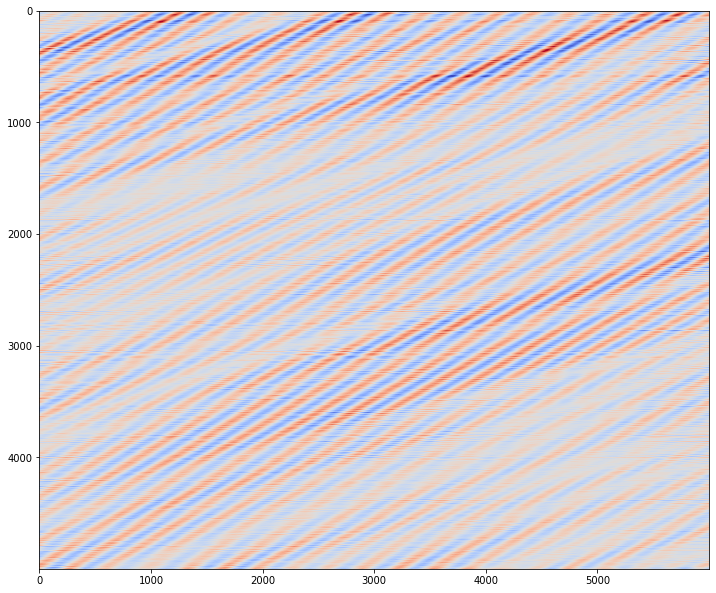

In [10]:
# dudt = 0.6768 *ux + 0.3174* uxxx# + 0.0033 *(working_dat**2) * ux + 0.0489* (working_dat**2) *uxxx
# dudt = 0.6369  + 0.3017 * uxxx  -0.0161  *(working_dat**2) * ux  + -0.0070 * (working_dat**2) *uxxx # the GOODIE
# dudt = 0.6369 *ux + 0.3017 * uxxx  
# dudt = 0.713190 *ux + 0.343974 *uxxx  -0.016264 *(working_dat**2) * ux -0.005133 *(working_dat**2) * uxxx 
# dudt = 0.997098 *ux + 0.082712 *uxxx + 0.063571  * (working_dat**2) *uxxx
# dudt = 0.9954 *ux + 0.0843 *uxxx + 0.0017 * (working_dat**2) *ux + 0.0015 * (working_dat) *uxxx + 0.0686 * (working_dat**2) *uxxx
dudt = 0.7016 *ux + 0.3356 *uxxx -0.0149 *(working_dat**2) * ux -0.0026 *(working_dat**2) * uxxx
plt.figure(figsize=(12,12))
plt.imshow(dudt,vmin=-0.1,vmax=0.1,cmap="coolwarm")
plt.show()

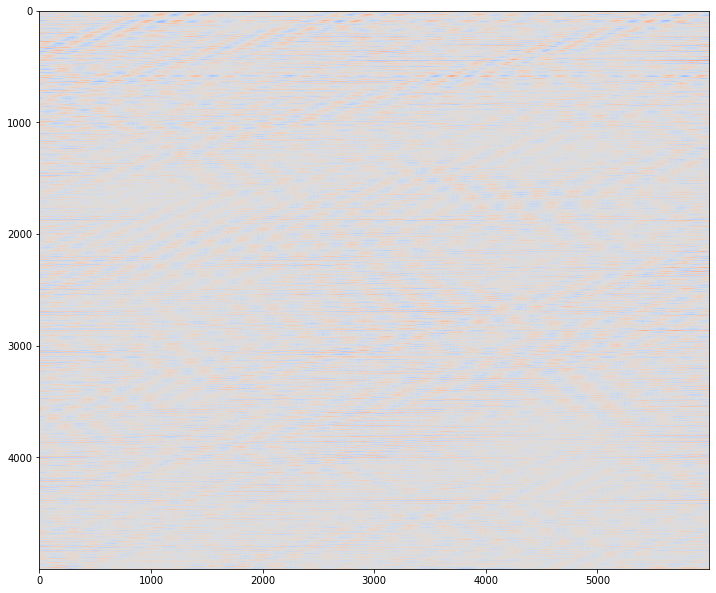

In [14]:
plt.figure(figsize=(12,12))
plt.imshow(ut-dudt,vmin=-0.1,vmax=0.1,cmap="coolwarm")
plt.show()

In [13]:
np.save("custom_deriv_discrepency_2.npy",ut-dudt)

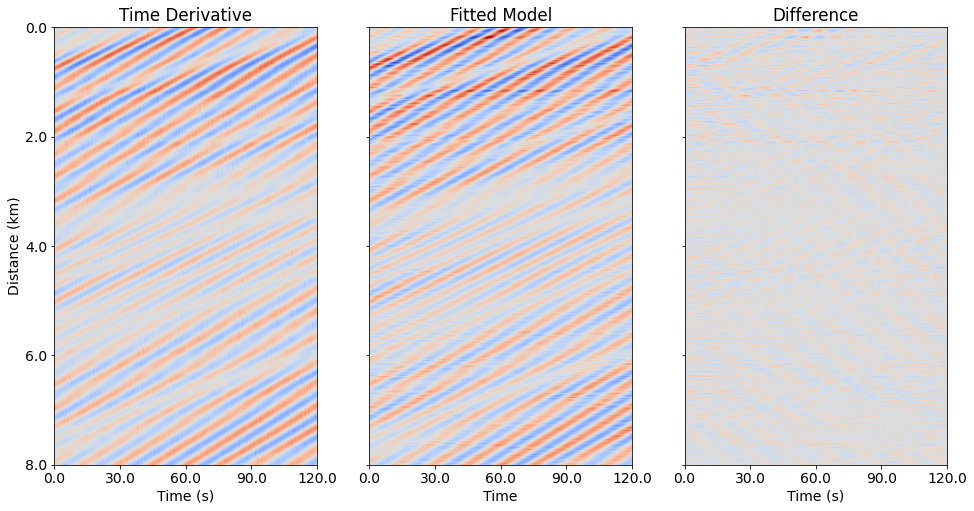

In [27]:
# data2 = ((2*np.pi)/2**16)*((1550.12 * 1e-9)/(0.78 * 4 * np.pi * n * L))*data[7500:12500,:]*1e6
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(nrows=1, ncols=3,figsize = (16, 12),sharey=True)
ax[0].imshow(ut[:4000,:2400],vmin=-0.08,vmax=0.08,cmap="coolwarm")
ax[1].imshow(dudt[:4000,:2400],vmin=-0.08,vmax=0.08, cmap="coolwarm")
ax[2].imshow((dudt-ut)[:4000,:2400],vmin=-0.08,vmax=0.08, cmap="coolwarm")

ax[0].set_yticks(np.linspace(0, 4000, 5),
            (2/1000)*np.linspace(0, 4000, 5))
ax[0].set_xticks(np.linspace(0,2400,5),(10/200)*np.linspace(0,2400,5))
ax[0].set_title('Time Derivative')
ax[0].set_xlabel("Time (s)",size=14)
ax[0].set_ylabel("Distance (km)",size=14)
ax[1].set_xticks(np.linspace(0,2400,5),(10/200)*np.linspace(0,2400,5))
ax[1].set_title('Fitted Model')
ax[1].set_xlabel("Time",size=14)
ax[2].set_title('Difference')
ax[2].set_xlabel("Time (s)",size=14)
ax[2].set_xticks(np.linspace(0,2400,5),(10/200)*np.linspace(0,2400,5))

plt.show()

In [133]:
np.mean(np.abs(ux-uxxx))

0.025895398320470584

In [135]:
np.mean(((dudt-ut)/ut))

0.1592038946401535

In [134]:
np.amax(np.abs(dudt-ut))

0.04702195469331445

In [132]:
np.amax(np.abs(ut))

0.07754741948528665

In [12]:
np.mean(np.abs(dudt-ut))/np.mean(np.abs(ut))

0.805771353942145